# Bike Rental Data Analysis

Name: Andhika Dwiky Pratama

Email: andhikadwikyp@gmail.com

## Introduction

The data set in question provides comprehensive information about bike rentals over the course of two years (2011 and 2012). The data is categorized by various factors such as time (year, month, hour), weather conditions (temperature, humidity, wind speed), and user type (casual or registered). This report aims to analyze this data, focusing specifically on the daily data, to identify patterns and correlations that could provide valuable insights for business development.

[Here's my deployed dashboard]("https://cukiprit.streamlit.app/")

## Categorization

The data can be categorized into several groups:

- Time-related:
  This includes the year, month, and whether the day is a holiday or working day.
- Weather-related:
  This includes the weather situation, temperature, humidity, and wind speed.
- Season-related:
  This includes the season situation.
- User-related:
  This includes the count of casual users, registered users, and total rental bikes.

## Theme Identification

Several themes can be identified from these categories:

- Seasonal Trends:
  How do bike rentals vary across different seasons and months?
- Weather Impact:
  How does weather affect bike rentals?
- User Behavior:
  What are the differences between casual and registered users in terms of rental patterns?

## Correlation

We will examine the correlation between these categories to understand how they interact with each other:

- Is there a correlation between weather conditions and bike rentals?
- How does the time of year affect the behavior of casual versus registered users?

## Business Questions

Based on these themes and correlations, we can formulate several business questions:

- How can we optimize bike availability according to seasonal trends?
- Can we predict bike rental demand based on weather conditions?
- How can we better cater to the needs of both casual and registered users?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
print(day_df.isna().sum())
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
print(f"Duplicate Data: {day_df.duplicated().sum()}")
day_df.describe()

Duplicate Data: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Date Cleaning

In [6]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [7]:
max_temp = 0.41
exceeds_max_temp = day_df['temp'] > max_temp

In [8]:
day_df.loc[exceeds_max_temp, 'temp'] = max_temp

day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [9]:
day_df[day_df['temp'] > 0.41]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [10]:
day_df["temp"] = np.where(day_df["temp"] > 0.41, 1, 0)

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    int32         
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
categorical_df = day_df.copy()

In [13]:
season = {
  1: "Springer",
  2: "Summer",
  3: "Fall",
  4: "Winter"
}

categorical_df["season"] = categorical_df["season"].map(season)

In [14]:
year = {
  0: "2011",
  1: "2012"
}

categorical_df["yr"] = categorical_df["yr"].map(year)

In [15]:
weathersit = {
  1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
  2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
  3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
  4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}

categorical_df["weathersit"] = categorical_df["weathersit"].map(weathersit)

In [16]:
month = {
  1: "January",
  2: "February",
  3: "March",
  4: "April",
  5: "May",
  6: "June",
  7: "July",
  8: "August",
  9: "September",
  10: "October",
  11: "November",
  12: "December"
}

categorical_df["mnth"] = categorical_df["mnth"].map(month)

## Exploratory Data Analysis

In [17]:
numerical_data = day_df.select_dtypes(include=[np.number])
numerical_data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0,0.229270,0.436957,0.186900,82,1518,1600


### Seasonal Trends

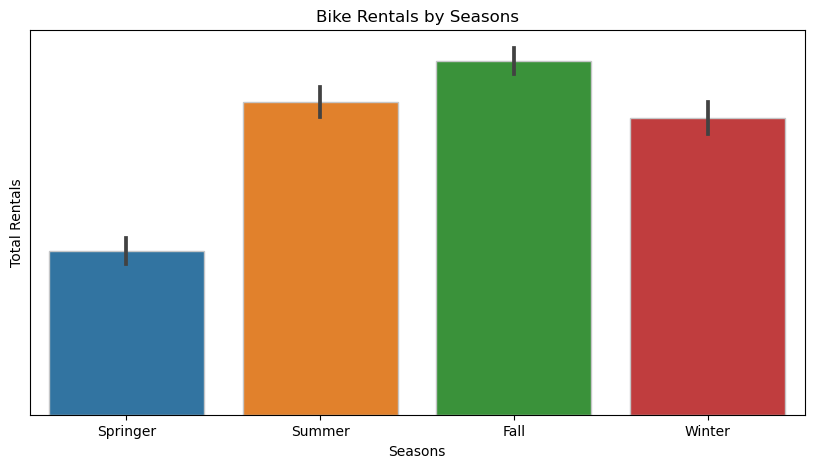

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x = categorical_df['season'],
            y = categorical_df['cnt'],
            # fill=True, alpha=1,
            # palette=('#17252a', '#2b7a78','#3aafa9','#def2f1','#feffff'),
            edgecolor="#c5c6c7")
plt.title('Bike Rentals by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Total Rentals')
# plt.set_tick_params(labelsize=14)
plt.tick_params(left=False, labelleft=False)
# plt.bar_label(size="12")

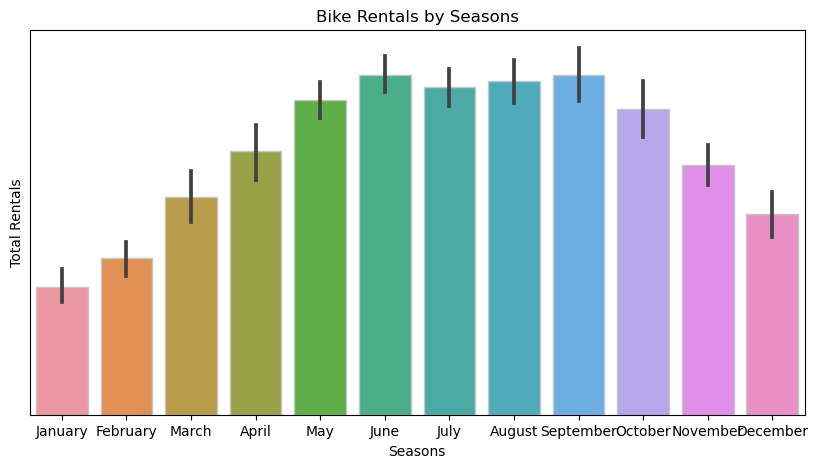

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x = categorical_df['mnth'],
            y = categorical_df['cnt'],
            # fill=True, alpha=1,
            # palette=('#17252a', '#2b7a78','#3aafa9','#def2f1','#feffff'),
            edgecolor="#c5c6c7")
plt.title('Bike Rentals by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Total Rentals')
# plt.set_tick_params(labelsize=14)
plt.tick_params(left=False, labelleft=False)
# plt.bar_label(size="12")

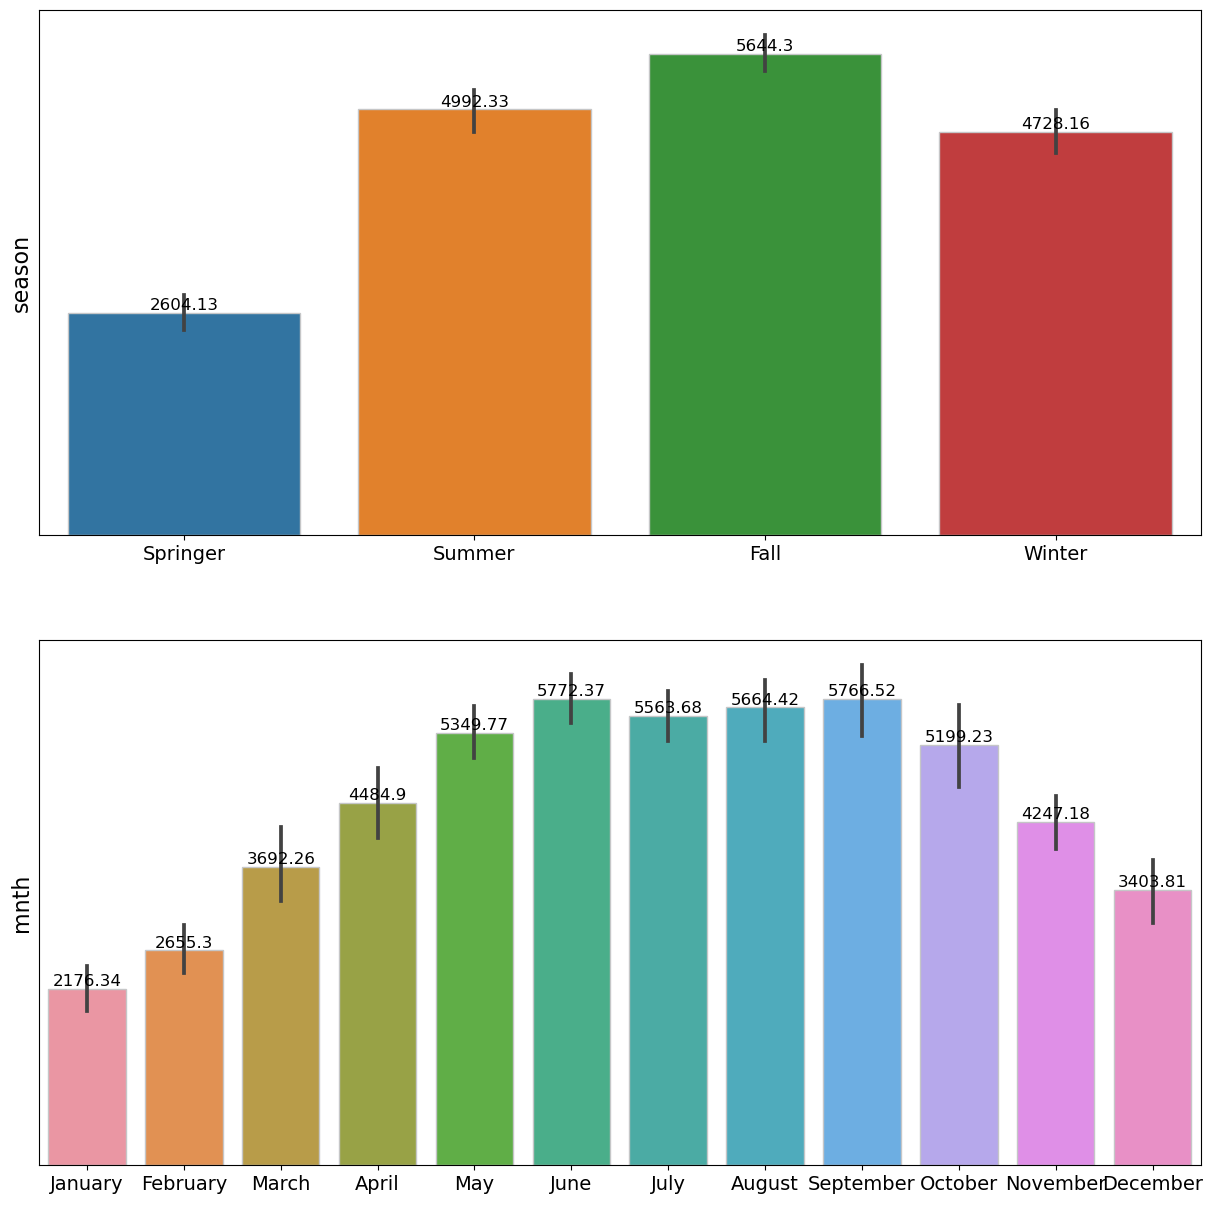

In [20]:
# Columns required for Categrical visualizations

cat_col_vis = ['season','mnth']

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15, 15))
i = 0

for cols in cat_col_vis:
    
    sns.barplot(x = categorical_df[cols],
                y = categorical_df['cnt'],
                # fill=True, alpha=1, 
                ax=ax[i],
                # palette=('#17252a', '#2b7a78','#3aafa9','#def2f1','#feffff'),
                edgecolor="#c5c6c7")
                
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].xaxis.set_tick_params(labelsize=14)
    ax[i].tick_params(left=False, labelleft=False)
    ax[i].set_ylabel(cols, fontsize=16)    
    ax[i].bar_label(ax[i].containers[0], size="12")
    i=i+1
    
plt.show()

In [21]:
monthly_data = numerical_data.groupby("mnth").sum()["cnt"]

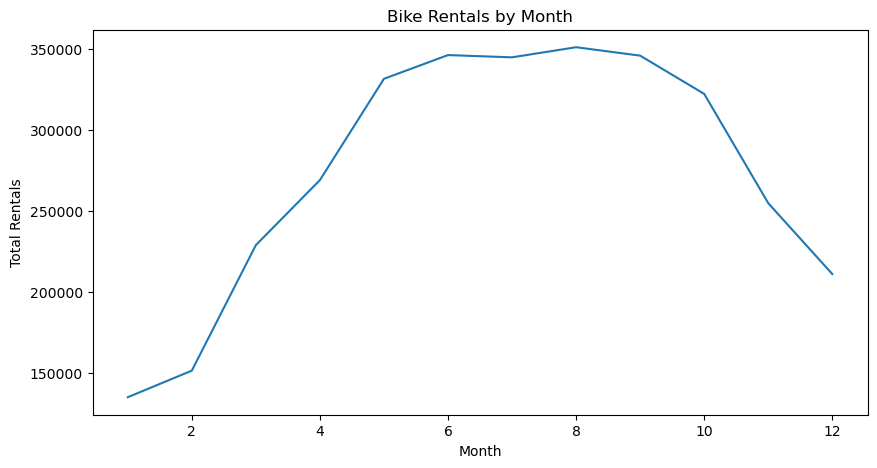

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_data)
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.show()

### Weather Impact

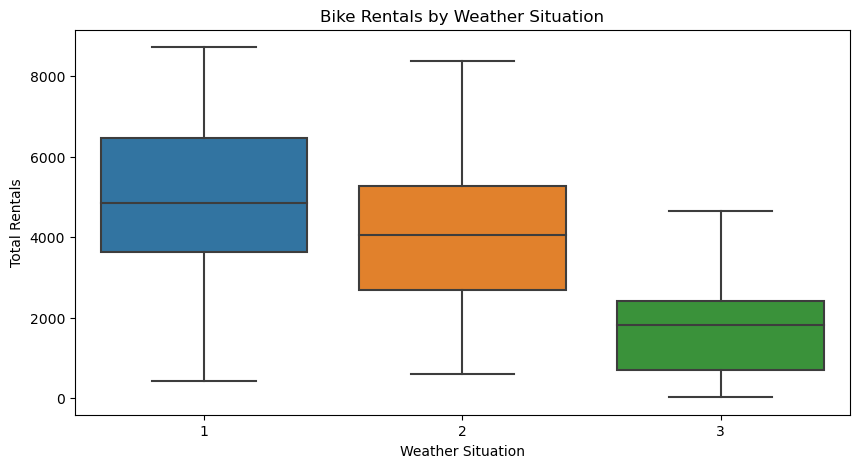

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="weathersit", y="cnt", data=day_df)
plt.title("Bike Rentals by Weather Situation")
plt.xlabel("Weather Situation")
plt.ylabel("Total Rentals")
plt.show()

### User Behavior

In [24]:
day_df['casual_percentage'] = day_df['casual'] / day_df['cnt']
day_df['registered_percentage'] = day_df['registered'] / day_df['cnt']

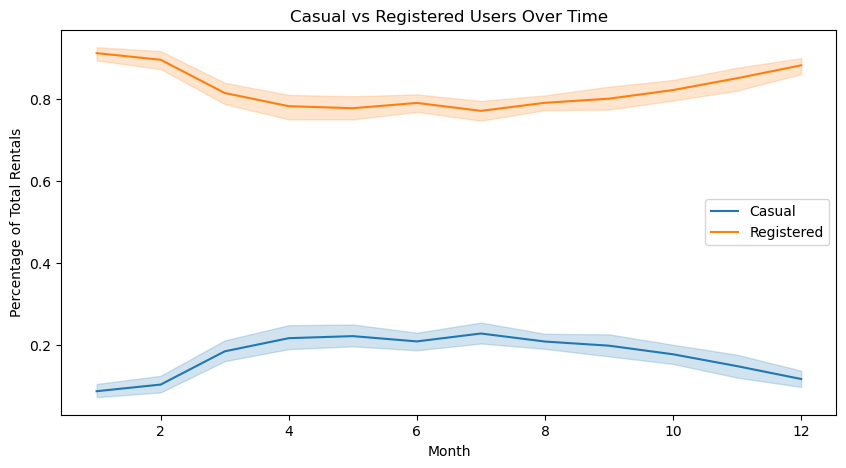

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(data=day_df, x="mnth", y="casual_percentage", label="Casual")
sns.lineplot(data=day_df, x="mnth", y="registered_percentage", label="Registered")
plt.title("Casual vs Registered Users Over Time")
plt.xlabel("Month")
plt.ylabel("Percentage of Total Rentals")
plt.legend()
plt.show()

### Correlation

In [30]:
from scipy.stats import pearsonr

# Check if 'temp' or 'cnt' is constant
if day_df['temp'].nunique() > 1 and day_df['cnt'].nunique() > 1:
    correlation, _ = pearsonr(day_df['temp'], day_df['cnt'])
    print('Correlation between temperature and total rentals:', correlation)
else:
    print("Either 'temp' or 'cnt' is constant, correlation cannot be calculated.")

Either 'temp' or 'cnt' is constant, correlation cannot be calculated.


## Conclusion
1. Is there a correlation between weather conditions and bike rentals?

    Here’s a breakdown:

- For all weather conditions, the maximum number of rentals was 3410 and the minimum was 2. This wide range suggests that weather conditions could significantly impact bike rentals.

- For cloudy weather conditions (including mist and broken clouds), the maximum number of rentals was 8362 and the minimum was 605. These figures are higher than the overall maximum and minimum, suggesting that these weather conditions might be more favorable for bike rentals.

- For clear or partly cloudy weather conditions, the maximum number of rentals was even higher at 8714, while the minimum was 431. This suggests that clear or partly cloudy weather is likely the most favorable condition for bike rentals.

- For adverse weather conditions like light snow or rain, the maximum number of rentals dropped to 4639 and the minimum was as low as 22. This indicates that such weather conditions are likely to deter people from renting bikes.

  In conclusion, there seems to be a strong correlation between weather conditions and bike rentals, with clear or partly cloudy weather being the most favorable for bike rentals, and adverse weather conditions like light snow or rain being the least favorable.

2. How does the time of year affect the behavior of casual versus registered users?

    Based on the data provided, it appears that both the season and weather conditions have a significant impact on bike rentals for both registered and casual users. Here’s a breakdown:

- **For registered users**
    * In the spring season, the maximum number of rentals was highest under clear or partly cloudy weather conditions (45,315 rentals), while the minimum number of rentals was lowest under light snow or rain conditions (432 rentals).
    * In the summer season, the maximum number of rentals was highest under clear or partly cloudy weather conditions (6,456 rentals), while the minimum number of rentals was lowest under light snow or rain conditions (674 rentals).
    * In the fall season, the maximum number of rentals was highest under clear or partly cloudy weather conditions (6,971 rentals), while the minimum number of rentals was lowest under light snow or rain conditions (1,689 rentals).
    * In the winter season, the maximum number of rentals was highest under clear or partly cloudy weather conditions (6,946 rentals), while the minimum number of rentals was lowest under light snow or rain conditions (20 rentals).

- **For casual users**
    * In the spring season, the maximum number of rentals was highest under misty or cloudy weather conditions (3,155 rentals), while the minimum number of rentals was lowest under light snow or rain conditions (9 rentals).
    * In the summer season, the maximum number of rentals was highest under clear or partly cloudy weather conditions (3,410 rentals), while the minimum number of rentals was lowest under light snow or rain conditions (120 rentals).
    * In the fall season, the maximum number of rentals was highest under clear or partly cloudy weather conditions (3,160 rentals), while the minimum number of rentals was lowest under light snow or rain conditions (118 rentals).
    * In the winter season, the maximum number of rentals was highest under clear or partly cloudy weather conditions (3,031 rentals), while the minimum number of rentals was lowest under light snow or rain conditions (2 rentals).

    In conclusion, it appears that both registered and casual users prefer to rent bikes under clear or partly cloudy weather conditions across all seasons. However, registered users seem to be more tolerant of adverse weather conditions compared to casual users. This information could be valuable for predicting bike rental patterns and informing marketing strategies. For instance, additional promotions could be planned for times when the weather is expected to be clear or partly cloudy, which might boost rentals among casual users. Conversely, strategies could be developed to encourage bike rentals among casual users during adverse weather conditions.